In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
def format_predicted(predicted):
  df_predicted = pd.DataFrame(predicted)
  df_predicted.columns = ['Predicted']
  df_predicted['Id'] = df_predicted.index
  df_predicted = df_predicted.reindex(columns=['Id', 'Predicted'])
  return df_predicted

In [3]:
df_train = pd.read_csv('train_final_complete.csv')
df_test = pd.read_csv('test_final_complete_cleaned.csv')

In [4]:
X_train = df_train[['built_year', 'num_beds', 'num_baths', 'lat', 'lng', 'size_sqft',
                    'tenure_group', 'subzone_per_price_encoded',
                    'property_type_ordinal',
                    #mrt
                    'dist_to_nearest_important_mrt_rounded',
                    #schools
                    'number_of_nearby_primary_schools', 
                    'number_of_nearby_secondary_schools', 
                    #shopping mall
                    'number_of_nearby_shopping_malls',
                    #CR
                    #'name_of_nearest_IHL_ordinal',
                    'name_of_nearest_BN_ordinal',
                    'name_of_nearest_CR_ordinal']]
y_train = df_train['per_price']
X_test = df_test[['built_year', 'num_beds', 'num_baths', 'lat', 'lng', 'size_sqft',
                    'tenure_group', 'subzone_per_price_encoded',
                    'property_type_ordinal',
                    #mrt
                    'dist_to_nearest_important_mrt_rounded',
                    #schools
                    'number_of_nearby_primary_schools', 
                    'number_of_nearby_secondary_schools', 
                    #shopping mall
                    'number_of_nearby_shopping_malls',
                    #CR
                    #'name_of_nearest_IHL_ordinal',
                    'name_of_nearest_BN_ordinal',
                    'name_of_nearest_CR_ordinal']]
X_train = X_train.reindex(columns=list(X_test.columns)) # unify column order

# AdaBoost

In [5]:
%%time

parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5], # default 0.1
    'n_estimators': [50, 100, 200, 400] # default 100
}

grid_search = GridSearchCV(
    AdaBoostRegressor(), 
    parameters, 
    cv=10, 
    n_jobs = -1) # use all processors
grid_search.fit(X_train, y_train)

print('Best parameters set found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_adaboost_regressor = grid_search.best_estimator_

Best parameters set found: {'learning_rate': 0.01, 'n_estimators': 100}
Best score: 0.7468770726347753
CPU times: total: 2.12 s
Wall time: 1min 39s


In [6]:
predicted = best_adaboost_regressor.predict(X_test)
predicted = predicted * X_test['size_sqft'] # convert price per square feet to price
df_predicted = format_predicted(predicted)
df_predicted.to_csv("task1_tree_ensembles/adaboost_predicted.csv", encoding='utf-8', index=None, header=True)

Text(0.5, 1.0, 'Feature Importance (MDI)')

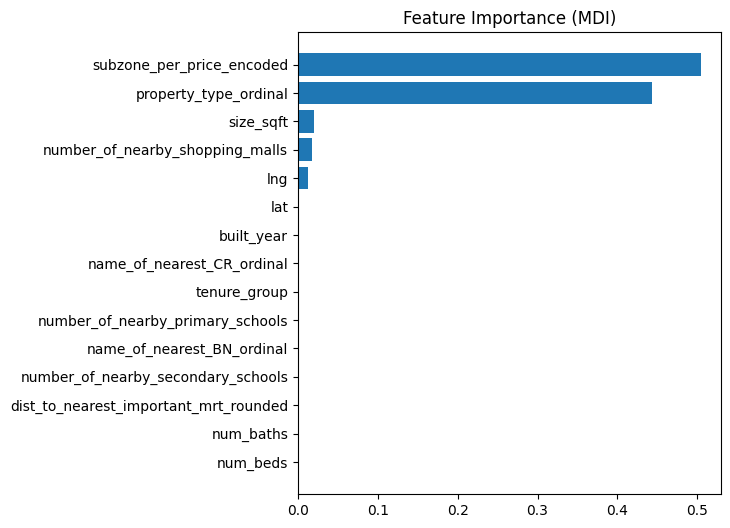

In [7]:
reg = best_adaboost_regressor
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

# Random Forest

In [42]:
%%time

parameters = {
    'max_depth': [5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 400],
    'max_features': [1, 2, 4, 8]
}

grid_search = GridSearchCV(
    RandomForestRegressor(), 
    parameters, 
    cv=10, 
    n_jobs = -1) # use all processors
grid_search.fit(X_train, y_train)

print('Best parameters set found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_random_forest_regressor = grid_search.best_estimator_

Best parameters set found: {'max_depth': 50, 'max_features': 8, 'n_estimators': 200}
Best score: 0.8798844337071147
CPU times: total: 5.97 s
Wall time: 7min 38s


In [43]:
predicted = best_random_forest_regressor.predict(X_test)
predicted = predicted * X_test['size_sqft'] # convert price per square feet to price
df_predicted = format_predicted(predicted)
df_predicted.to_csv("task1_tree_ensembles/random_forest_predicted.csv", encoding='utf-8', index=None, header=True)

Text(0.5, 1.0, 'Feature Importance (MDI)')

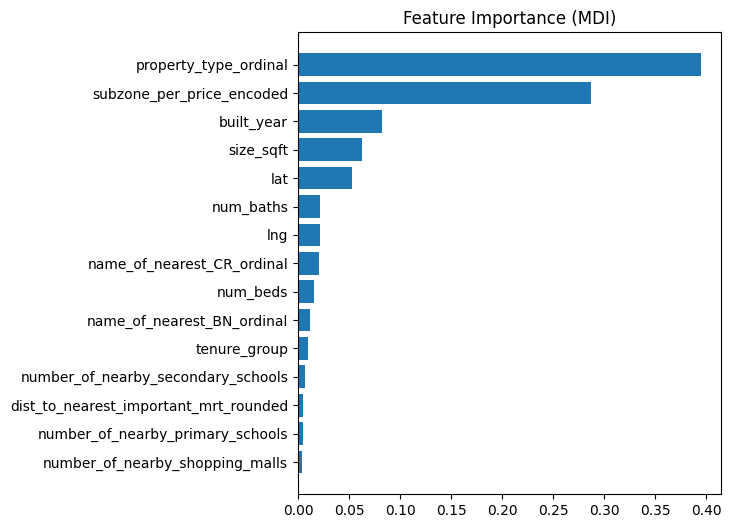

In [44]:
reg = best_random_forest_regressor
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

# Gradient Boosting

In [39]:
%%time

parameters = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'max_depth': [4, 6, 8, 10],
    'n_estimators': [50, 100, 200, 400]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(), 
    parameters,
    cv=10, 
    n_jobs = -1) # use all processors
grid_search.fit(X_train, y_train)

print('Best parameters set found:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
best_gradient_boosting_regressor = grid_search.best_estimator_

Best parameters set found: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 400}
Best score: 0.8857778437857073
CPU times: total: 8.42 s
Wall time: 18min 10s


In [40]:
predicted = best_gradient_boosting_regressor.predict(X_test)
predicted = predicted * X_test['size_sqft'] # convert price per square feet to price
df_predicted = format_predicted(predicted)
df_predicted.to_csv("task1_tree_ensembles/gradient_boosting_predicted.csv", encoding='utf-8', index=None, header=True)

Text(0.5, 1.0, 'Feature Importance (MDI)')

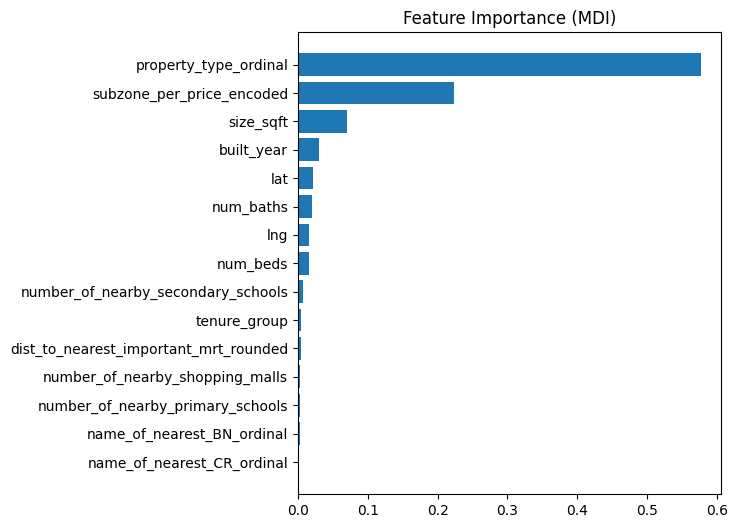

In [41]:
reg = best_random_forest_regressor
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")